In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "https://raw.githubusercontent.com/shobhit-nigam/knowledgeclan/main/datasets/synth_temp.csv"

In [3]:
dfa = pd.read_csv(path)

In [4]:
dfa

,AverageTemperature,Year
0,12.980258,1841
1,13.689697,1842
2,12.485703,1843
3,14.202069,1844
4,12.831530,1845
...,...,...
1945,19.573018,2006
1946,19.975516,2007
1947,19.617621,2008
1948,19.980084,2009


In [5]:
dfb = dfa[dfa['Year'] > 1901]

In [6]:
dfb

,AverageTemperature,Year
366,16.973653,1902
367,17.181773,1903
368,17.436933,1904
369,17.688948,1905
370,17.811166,1906
...,...,...
1945,19.573018,2006
1946,19.975516,2007
1947,19.617621,2008
1948,19.980084,2009


In [8]:
dfb.tail(20)

,AverageTemperature,Year
1930,18.651364,1991
1931,19.058583,1992
1932,19.224982,1993
1933,19.216401,1994
1934,18.983689,1995
1935,19.276549,1996
1936,19.573677,1997
1937,19.578194,1998
1938,19.558279,1999
1939,19.550557,2000


In [10]:
dfb.index = np.arange(1452)

In [11]:
dfb

,AverageTemperature,Year
0,16.973653,1902
1,17.181773,1903
2,17.436933,1904
3,17.688948,1905
4,17.811166,1906
...,...,...
1447,19.573018,2006
1448,19.975516,2007
1449,19.617621,2008
1450,19.980084,2009


In [20]:
dfb_group_year = dfb.groupby('Year').agg(np.mean)

In [21]:
dfb_group_year

,AverageTemperature
Year,
1902,17.438122
1903,17.375456
1904,17.558674
1905,17.740646
1906,17.501770
...,...
2006,19.827744
2007,19.694244
2008,19.793876


In [12]:
# moving average filter

In [19]:
dfb[dfb["Year"] == 2002]

,AverageTemperature,Year
1212,19.977052,2002
1233,19.240852,2002
1254,19.410381,2002
1275,19.457610,2002
1296,19.857071,2002
1317,19.278535,2002
1338,19.507882,2002
1359,19.896580,2002
1380,19.247033,2002
1401,19.929583,2002


In [22]:
dfb_group_year.columns

Index(['AverageTemperature'], dtype='object')

In [23]:
objr = dfb_group_year['AverageTemperature'].rolling(10).mean()

In [24]:
objr.head(20)

Year
1902          NaN
1903          NaN
1904          NaN
1905          NaN
1906          NaN
1907          NaN
1908          NaN
1909          NaN
1910          NaN
1911    17.501145
1912    17.502700
1913    17.500737
1914    17.487112
1915    17.466333
1916    17.460069
1917    17.475434
1918    17.463959
1919    17.472423
1920    17.474037
1921    17.480317
Name: AverageTemperature, dtype: float64

In [25]:
dfb_group_year

,AverageTemperature
Year,
1902,17.438122
1903,17.375456
1904,17.558674
1905,17.740646
1906,17.501770
...,...
2006,19.827744
2007,19.694244
2008,19.793876


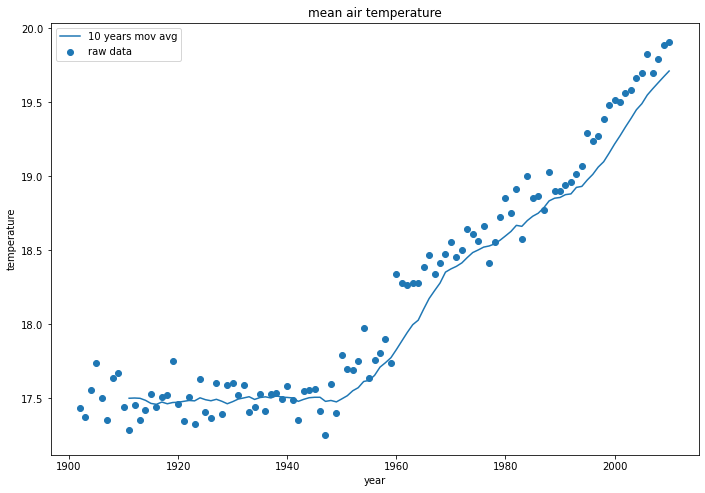

In [27]:
objf = plt.figure(figsize=(9, 6))

ax = objf.add_axes([1, 1, 1, 1])

# temp measurements 

ax.scatter(dfb_group_year.index, dfb_group_year['AverageTemperature'], label='raw data')
ax.plot(dfb_group_year.index, objr, label='10 years mov avg')

ax.set_title('mean air temperature')
ax.set_xlabel('year')
ax.set_ylabel('temperature')
ax.legend()
plt.show()

### Least Squares method

x , y <br>

x_mean, y_mean <br>

sum((x - x_mean) (y - y_meean))/ sum(x-x_mean)

In [28]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()

### simple linear regression

In [44]:
X = dfb.iloc[:, 1:].values  
# independant variable 

In [45]:
y = dfb.iloc[:, 0].values 
# dependant variable vector

In [46]:
X

array([[1902],
       [1903],
       [1904],
       ...,
       [2008],
       [2009],
       [2010]])

In [47]:
y

array([16.97365282, 17.18177329, 17.43693268, ..., 19.61762072,
       19.98008381, 20.48283926])

In [33]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=3)

In [49]:
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)

y_pred

array([17.45048186, 18.13612206, 17.26133974, 18.32526418, 17.04855485,
       18.44347801, 18.11247929, 18.41983525, 19.29461757, 19.27097481,
       17.04855485, 17.68690951, 17.14312591, 19.38918863, 17.47412462,
       18.041551  , 18.7981195 , 19.05818992, 18.75083396, 18.18340759,
       18.39619248, 17.00126931, 16.95398378, 19.27097481, 17.14312591,
       18.30162142, 17.8996944 , 18.98726162, 18.75083396, 19.12911821,
       17.99426547, 19.17640374, 17.23769697, 18.23069312, 17.94697994,
       18.20705036, 18.20705036, 18.53804907, 17.66326675, 17.71055228,
       18.39619248, 16.95398378, 19.12911821, 19.29461757, 16.97762655,
       18.96361885, 18.98726162, 19.01090439, 18.30162142, 18.7981195 ,
       18.23069312, 18.13612206, 19.08183268, 18.86904779, 19.36554587,
       17.68690951, 17.42683909, 17.19041144, 17.85240887, 18.89269056,
       18.06519376, 17.33226803, 17.85240887, 17.16676867, 17.47412462,
       19.27097481, 17.23769697, 17.52141016, 17.42683909, 19.41

In [51]:
y_test

array([17.35461534, 18.1479518 , 17.6097224 , 17.73410565, 18.26665345,
       18.44633669, 18.05273855, 17.95004723, 19.46824235, 19.64749879,
       17.8703323 , 17.18294159, 18.10322991, 19.73969706, 18.44270149,
       18.57065686, 19.40892463, 19.19244943, 18.88635307, 17.87984648,
       18.49367159, 18.1246089 , 18.01413568, 18.86116008, 16.43657244,
       18.04562775, 17.86703251, 19.29725571, 18.81855028, 18.95757346,
       16.93984537, 19.13513626, 17.90767478, 18.16308383, 17.20414087,
       16.92258709, 18.22387094, 18.29824145, 17.56982888, 17.75355833,
       18.88047906, 18.06334343, 19.33644009, 19.46004729, 17.81116622,
       19.03244443, 19.13271396, 19.17463215, 18.52891351, 18.46359426,
       17.54224338, 17.91145879, 19.30101803, 19.12445536, 19.45189047,
       17.41085617, 17.73674938, 17.30782055, 17.91147411, 18.41659226,
       17.08628331, 17.57748788, 16.52497626, 17.70469476, 17.81623579,
       19.71569596, 17.58038414, 18.08602764, 17.93399878, 19.94

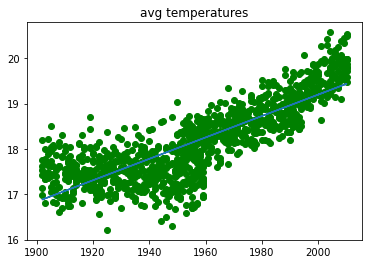

In [52]:
plt.scatter(X_train, y_train, color='green')  # observation line
plt.plot(X_train, model.predict(X_train)) # regression line

plt.title("avg temperatures")
plt.show()

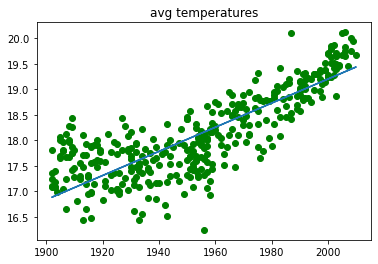

In [54]:
plt.scatter(X_test, y_test, color='green')  # observation line
plt.plot(X_test, model.predict(X_test)) # regression line

plt.title("avg temperatures")
plt.show()

In [55]:
model.score(X, y)

0.6712375203927148

In [56]:
model.score(X_test, y_test)

0.6472461757854617

In [62]:
X = dfb_group_year.index.values
# independant variable 

y = dfb_group_year.iloc[:, 0].values 
# dependant variable vector

In [63]:
X

array([1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [66]:
X = X.reshape((-1, 1))

In [67]:
X

array([[1902],
       [1903],
       [1904],
       [1905],
       [1906],
       [1907],
       [1908],
       [1909],
       [1910],
       [1911],
       [1912],
       [1913],
       [1914],
       [1915],
       [1916],
       [1917],
       [1918],
       [1919],
       [1920],
       [1921],
       [1922],
       [1923],
       [1924],
       [1925],
       [1926],
       [1927],
       [1928],
       [1929],
       [1930],
       [1931],
       [1932],
       [1933],
       [1934],
       [1935],
       [1936],
       [1937],
       [1938],
       [1939],
       [1940],
       [1941],
       [1942],
       [1943],
       [1944],
       [1945],
       [1946],
       [1947],
       [1948],
       [1949],
       [1950],
       [1951],
       [1952],
       [1953],
       [1954],
       [1955],
       [1956],
       [1957],
       [1958],
       [1959],
       [1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [19

In [69]:
X = dfb_group_year.index.values
# independant variable 

y = dfb_group_year.iloc[:, 0].values 
# dependant variable vector

X = X.reshape((-1, 1))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state = 0)


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred = model.predict(X_test)

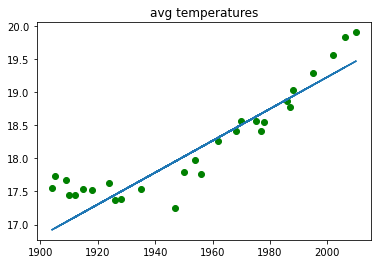

In [71]:
plt.scatter(X_test, y_test, color='green')  # observation line
plt.plot(X_test, model.predict(X_test)) # regression line

plt.title("avg temperatures")
plt.show()

### parabolic model

In [72]:
dfb_group_year

,AverageTemperature
Year,
1902,17.438122
1903,17.375456
1904,17.558674
1905,17.740646
1906,17.501770
...,...
2006,19.827744
2007,19.694244
2008,19.793876


In [75]:
model.score(X_test, y_test)

0.8010190212788783

In [76]:
model.score(X, y)

0.8596129519591835

In [73]:
dfb_group_year['Year'] = dfb_group_year.index
dfb_group_year['Year_square'] = dfb_group_year.index ** 2

In [74]:
dfb_group_year

,AverageTemperature,Year,Year_square
Year,,,
1902,17.438122,1902,3617604
1903,17.375456,1903,3621409
1904,17.558674,1904,3625216
1905,17.740646,1905,3629025
1906,17.501770,1906,3632836
...,...,...,...
2006,19.827744,2006,4024036
2007,19.694244,2007,4028049
2008,19.793876,2008,4032064


In [ ]:
objf = plt.figure(figsize=(9, 6))

ax = objf.add_axes([1, 1, 1, 1])

# temp measurements 

ax.scatter(dfb_group_year.index, dfb_group_year['AverageTemperature'], label='raw data')
ax.plot(dfb_group_year.index, objr, label='10 years mov avg')
ax.plot(dfb_group_year.index, objr, label='10 years mov avg')

ax.set_title('mean air temperature')
ax.set_xlabel('year')
ax.set_ylabel('temperature')
ax.legend()
plt.show()

In [ ]:
trend_x = np.zeroe

In [77]:
dfb_group_year.head(3)

,AverageTemperature,Year,Year_square
Year,,,
1902,17.438122,1902,3617604
1903,17.375456,1903,3621409
1904,17.558674,1904,3625216


In [78]:
X = dfb_group_year[['Year', 'Year_square']]
# independant variable 

y = dfb_group_year.iloc[:, 0].values 
# dependant variable vector


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state = 0)


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
y_pred = model.predict(X_test)

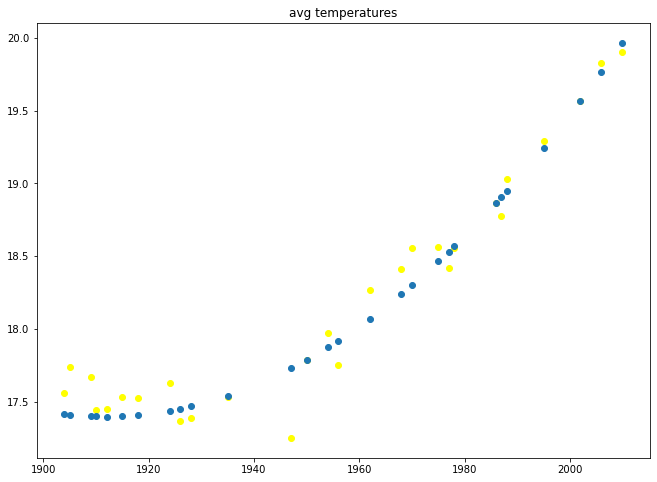

In [95]:
plt.figure(figsize=(11,8))

plt.scatter(X_test['Year'], y_test, color='yellow')  # observation line
plt.scatter(X_test['Year'], y_pred) # regression line

plt.title("avg temperatures")
plt.show()